In [10]:
import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet


In [11]:
df = pd.read_csv('temps.csv')
df = df.dropna()
df['dt'] = pd.DatetimeIndex(df['dt'])

#df = df[df.dt > '2007-1-1']
df = df[df.dt < '2010-1-1']


df = df[df.Country == "Guatemala"]
df = df.rename(columns={'dt': 'ds','AverageTemperature': 'y'})
df.sort_values(by="ds")
df = df.drop('AverageTemperatureUncertainty', axis =1)

df.tail(20)


,ds,y,Country
220267,2008-05-01,25.883,Guatemala
220268,2008-06-01,24.445,Guatemala
220269,2008-07-01,24.286,Guatemala
220270,2008-08-01,24.768,Guatemala
220271,2008-09-01,24.598,Guatemala
220272,2008-10-01,22.755,Guatemala
220273,2008-11-01,21.427,Guatemala
220274,2008-12-01,21.153,Guatemala
220275,2009-01-01,21.192,Guatemala
220276,2009-02-01,21.725,Guatemala


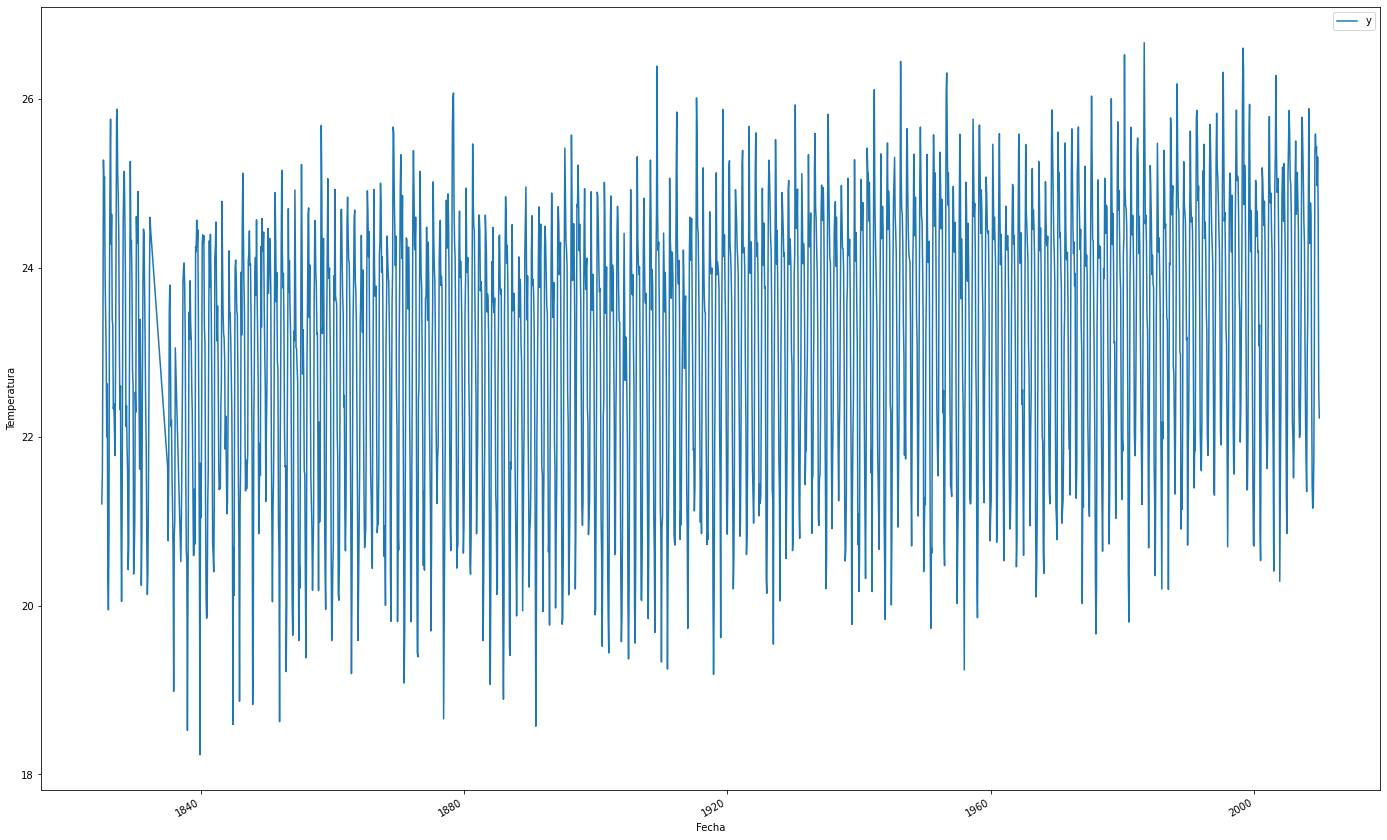

In [12]:

ax = df.set_index('ds').plot(figsize=(24,16))
ax.set_ylabel('Temperatura')
ax.set_xlabel('Fecha')

plt.show();

In [13]:
mi_modelo = Prophet(interval_width = 0.95)
mi_modelo.fit(df)

22:56:07 - cmdstanpy - INFO - Chain [1] start processing
22:56:07 - cmdstanpy - INFO - Chain [1] done processing


In [14]:
#Prediccion de temperatura promedio en Guatemala de 1800 a 2013

fechas_futuras = mi_modelo.make_future_dataframe(periods=36, freq='MS')
print(fechas_futuras.tail())

             ds
2212 2012-08-01
2213 2012-09-01
2214 2012-10-01
2215 2012-11-01
2216 2012-12-01


In [15]:
prediccion = mi_modelo.predict(fechas_futuras)
prediccion[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
2212,2012-08-01,24.985573,23.914409,26.054995
2213,2012-09-01,24.681650,23.587776,25.825297
2214,2012-10-01,23.719548,22.580531,24.885716
2215,2012-11-01,22.628326,21.508839,23.657606
2216,2012-12-01,21.610059,20.547139,22.761447


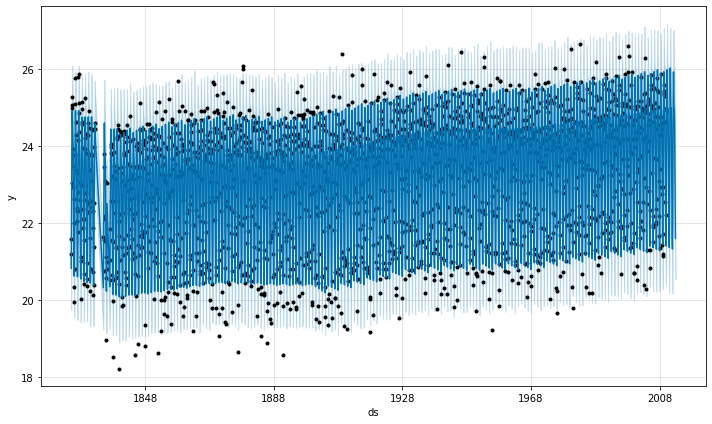

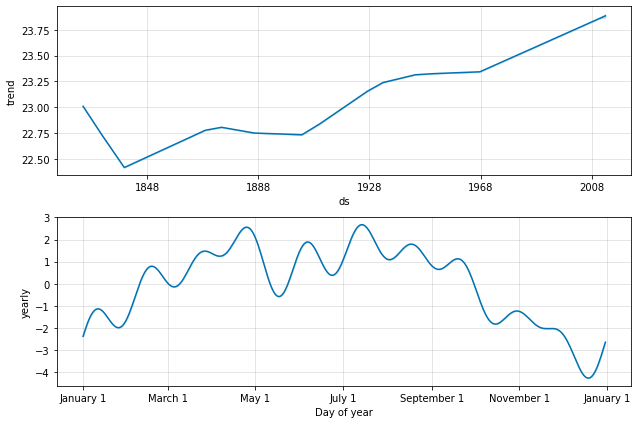

In [16]:
mi_modelo.plot(prediccion,
               uncertainty=True);

mi_modelo.plot_components(prediccion);
